In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import color_palette

In [3]:
hosts= []
dataset= []
df= None 

In [5]:
def set_hostnames(number_of_hosts: int) -> None:
    sistema_prefix = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1
    entorno_prefix = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    pais_prefix= ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    grupo_alpha=[]

    for i in range (number_of_hosts):
        pais= random.choice(pais_prefix)
        host= random.choice(sistema_prefix) + random.choice(entorno_prefix) 
        host+= pais
        grupo_alpha.append(host)
        host += str(grupo_alpha.count(host)).zfill(3)
        hosts.append(host)

In [7]:
def get_os(hostname:str)-> str:
    if hostname.startswith ('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

In [9]:
def get_environment(hostname:str)-> str:
    if hostname [1] == ('D'):
        return 'Development'
    elif hostname [1] == ('I'):
        return 'Integration'
    elif hostname [1] == ('T'):
        return 'Testing'
    elif hostname [1] == ('S'):
        return 'Staging'
    elif hostname [1] == ('P'):
        return 'Production'
    else:
        return 'Unknow'

In [11]:
def get_country(hostname:str)-> str:
    if hostname [2:5] == ('NOR'):
        return 'Norway'
    elif hostname [2:5] == ('FRA'):
        return 'France'
    elif hostname [2:5] == ('ITA'):
        return 'Italy'
    elif hostname [2:5] == ('ESP'):
        return 'Spain'
    elif hostname [2:5] == ('IRL'):
        return 'Irland'
    elif hostname [2:5] == ('DEU'):
        return 'Germany'
    else:
        return 'Unknow'

In [13]:
def set_dataframe(count:int):
    global df 
    
    set_hostnames(count)

    for hostname in hosts:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'environment': get_environment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })
    df=pd.DataFrame(dataset)

In [15]:
set_dataframe(1500)

In [17]:
df

,hostname,os,environment,country,node
0,STDEU001,Solaris,Testing,Germany,1
1,ATFRA001,AIX,Testing,France,1
2,SSDEU001,Solaris,Staging,Germany,1
3,HSITA001,HP-UX,Staging,Italy,1
4,LPIRL001,Linux,Production,Irland,1
...,...,...,...,...,...
1495,HIIRL002,HP-UX,Integration,Irland,2
1496,LPIRL050,Linux,Production,Irland,50
1497,STESP022,Solaris,Testing,Spain,22
1498,HIFRA001,HP-UX,Integration,France,1


In [19]:
df.to_csv('hosts.csv', header=True, index=False)

In [21]:
hosts_df = pd.read_csv(r'hosts.csv', encoding='ISO-8859-1')

In [23]:
hosts_df

,hostname,os,environment,country,node
0,STDEU001,Solaris,Testing,Germany,1
1,ATFRA001,AIX,Testing,France,1
2,SSDEU001,Solaris,Staging,Germany,1
3,HSITA001,HP-UX,Staging,Italy,1
4,LPIRL001,Linux,Production,Irland,1
...,...,...,...,...,...
1495,HIIRL002,HP-UX,Integration,Irland,2
1496,LPIRL050,Linux,Production,Irland,50
1497,STESP022,Solaris,Testing,Spain,22
1498,HIFRA001,HP-UX,Integration,France,1


In [25]:
country_environment = hosts_df
country_environment = country_environment.groupby(['country', country_environment['environment']]).size()
country_environment

country  environment
France   Development     13
         Integration     11
         Production      43
         Staging         37
         Testing         40
Germany  Development     32
         Integration     37
         Production     107
         Staging         90
         Testing         96
Irland   Development     27
         Integration     32
         Production     136
         Staging        134
         Testing         96
Italy    Development     18
         Integration     22
         Production      75
         Staging         72
         Testing         55
Norway   Development     10
         Integration      7
         Production      30
         Staging         21
         Testing         23
Spain    Development     21
         Integration     21
         Production      67
         Staging         58
         Testing         69
dtype: int64

In [27]:
country_environment.unstack()

environment,Development,Integration,Production,Staging,Testing
country,,,,,
France,13,11,43,37,40
Germany,32,37,107,90,96
Irland,27,32,136,134,96
Italy,18,22,75,72,55
Norway,10,7,30,21,23
Spain,21,21,67,58,69


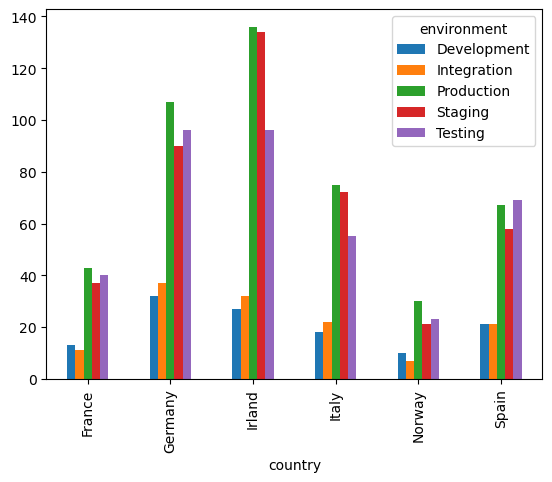

In [29]:
country_environment.unstack().plot(kind='bar')
plt.show()

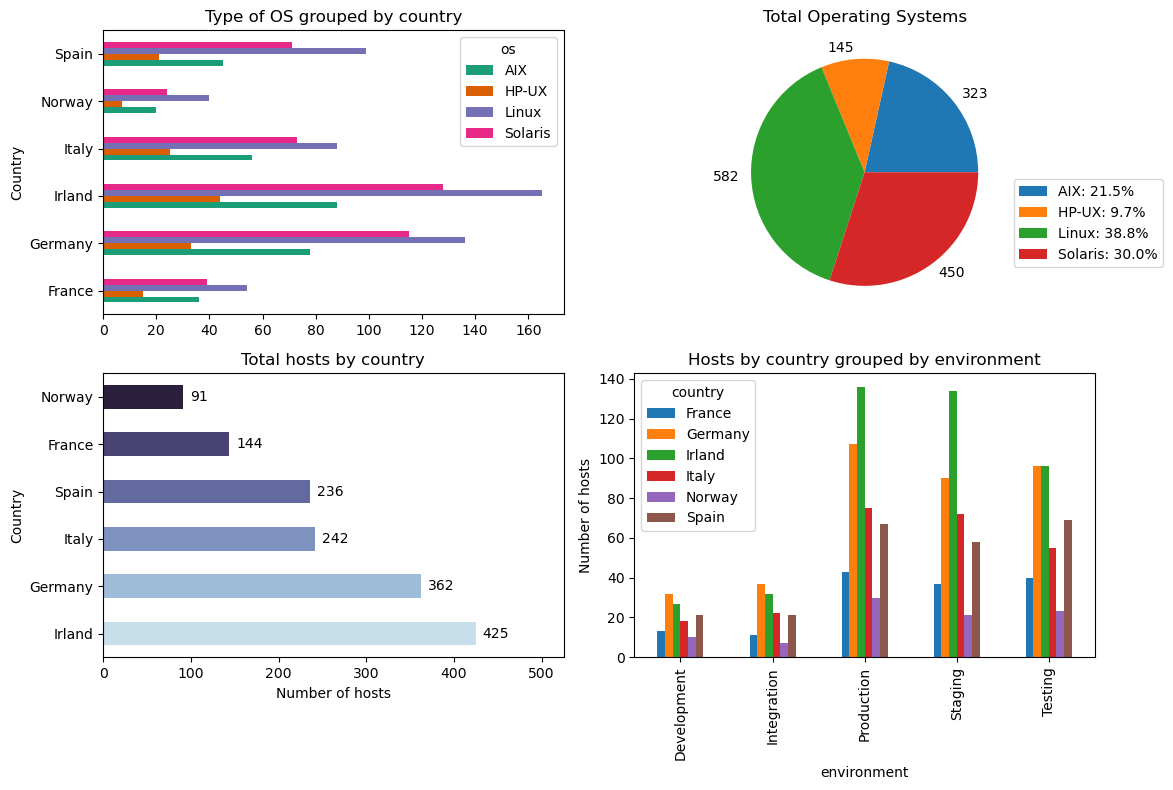

In [63]:
OS_grouped_by_country = hosts_df.groupby(['country', 'os']).size()
OS_grouped_by_country = OS_grouped_by_country.unstack()

country_counts = hosts_df['country'].value_counts()

hosts_by_country_and_environment = hosts_df.groupby(['country', 'environment']).size()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Barh of Type of OS grouped by country

palette_barh= color_palette(palette= 'Dark2')
OS_grouped_by_country.plot(kind='barh', stacked=False, ax=axs[0, 0], color=palette_barh )
axs[0, 0].set_title('Type of OS grouped by country')
axs[0, 0].set_ylabel('Country')

# Pie chart of Total Operating Systems

pie_values = hosts_df.groupby(['os']).size()
pie_labels = [f"{value}" for label, value in zip(pie_values.index, pie_values)]
pie_index = pie_values.index 

wedges, texts = axs[0, 1].pie(pie_values, labels=pie_labels, autopct=None)

total = pie_values.sum()

porcentajes = [] 
for label, value in zip(pie_index, pie_values):
    porcentaje = f"{label}: {value / total * 100:.1f}%"  
    porcentajes.append(porcentaje)  

axs[0, 1].legend(wedges, porcentajes, loc="best", bbox_to_anchor=(1, 0.5))
axs[0, 1].set_title('Total Operating Systems')

# Barh for Total hosts by country
palette = color_palette("ch:s=.25,rot=-.25", n_colors=len(country_counts))

country_counts.plot(kind='barh', stacked=False, ax=axs[1, 0], color=palette)
axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')

for i, value in enumerate(country_counts):
    axs[1, 0].annotate(str(value), xy=(value, i), xytext=(5, -3), textcoords='offset points')

max_value = country_counts.max() 
axs[1, 0].set_xlim(0, max_value + 100) 

# bar
hosts_by_country_and_environment.unstack(0).plot(kind='bar', stacked=False, ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by environment')
axs[1, 1].set_ylabel('Number of hosts')
axs[1, 1].set_xlabel('environment')

fig.tight_layout()

plt.show()
